In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [10]:
raw_data = pd.read_csv('./Data/Absenteeism-data.csv')
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         700 non-null    int64  
 1   Reason for Absence         700 non-null    int64  
 2   Date                       700 non-null    object 
 3   Transportation Expense     700 non-null    int64  
 4   Distance to Work           700 non-null    int64  
 5   Age                        700 non-null    int64  
 6   Daily Work Load Average    700 non-null    float64
 7   Body Mass Index            700 non-null    int64  
 8   Education                  700 non-null    int64  
 9   Children                   700 non-null    int64  
 10  Pets                       700 non-null    int64  
 11  Absenteeism Time in Hours  700 non-null    int64  
dtypes: float64(1), int64(10), object(1)
memory usage: 65.8+ KB


##Column Descriptions
Feature  Description
1.	ID (Individual Identification)
2.	Reason for Absence (Reasons 1 - 21 are registered in the International Classification of Diseases (ID),
Reasons 22 - 28 are not)
    1.	Certain infectious and parositic diseases
    2.	Neoplasms
    3.	Diseases of the blood and blood-forming orgons and certain disorders involving the immune mechanism
    4.	Endocrine, nutritional and metabolic diseases
    5.	Mental and behavioural disorders
    6.	Diseases of the nervous system
    7.	Diseases of the eye and adnexa
    8.	Diseases of the ear and mastoid process
    9.	Diseases of the circulatory system
    10.	Diseases of the respiratory system
    11.	Diseases of the digestive system
    12.	Diseases of the skin and subcutaneous tissue
    13.	Diseases of the musculoskeletal system and connective tissue
    14.	Diseases of the genitourinary system
    15.	Pregnancy, childbirth and the puerperium
    16.	Certain conditions originating in the perinatal period
    17.	Congenital malformations, deformations and chromosomal abnormalities
    18.	Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified
    19.	Injury, poisoning and certain other consequences of external causes
    20.	External causes of morbidity and mortality
    21.	Foctors influencing health status and contact with health services.
    22.	Patient follow-up
    23.	Medical consultation
    24.	Blood donation
    25.	Laboratory examination
    26.	Unjustified absence
    27.	Physiotherapy
    28.	Dental consultation

3.	Date (date of absence)
4.	Transportation Expense (costs related to business travel such as fuel, parking, and meals)
5.	Distance to Work (measured in kilometres)
6.	Age (years of age)
7.	Daily Work Load Average (measured in minutes)
8.	Body Mass Index
9.	Education (a categorical variable, representing different levels of education)
10.	Children (number of children in the family)
11.	Pets (number of Pets in the family)
12.	Absenteeism Time in Hours



## Basic analysis

In [11]:
raw_data.describe()

,ID,Reason for Absence,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,17.951429,19.411429,222.347143,29.892857,36.417143,271.801774,26.737143,1.282857,1.021429,0.687143,6.761429
std,11.028144,8.356292,66.312960,14.804446,6.379083,40.021804,4.254701,0.668090,1.112215,1.166095,12.670082
min,1.000000,0.000000,118.000000,5.000000,27.000000,205.917000,19.000000,1.000000,0.000000,0.000000,0.000000
25%,9.000000,13.000000,179.000000,16.000000,31.000000,241.476000,24.000000,1.000000,0.000000,0.000000,2.000000
50%,18.000000,23.000000,225.000000,26.000000,37.000000,264.249000,25.000000,1.000000,1.000000,0.000000,3.000000
75%,28.000000,27.000000,260.000000,50.000000,40.000000,294.217000,31.000000,1.000000,2.000000,1.000000,8.000000
max,36.000000,28.000000,388.000000,52.000000,58.000000,378.884000,38.000000,4.000000,4.000000,8.000000,120.000000


In [12]:
raw_data.head()

,ID,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,11,26,07/07/2015,289,36,33,239.554,30,1,2,1,4
1,36,0,14/07/2015,118,13,50,239.554,31,1,1,0,0
2,3,23,15/07/2015,179,51,38,239.554,31,1,0,0,2
3,7,7,16/07/2015,279,5,39,239.554,24,1,2,0,4
4,11,23,23/07/2015,289,36,33,239.554,30,1,2,1,2


In [13]:
raw_data['Age'].unique()

array([33, 50, 38, 39, 28, 36, 34, 37, 41, 47, 29, 48, 32, 27, 43, 40, 31,
       30, 49, 58, 46], dtype=int64)

Text(0.5, 0, 'Absenteeism distribution in Hours')

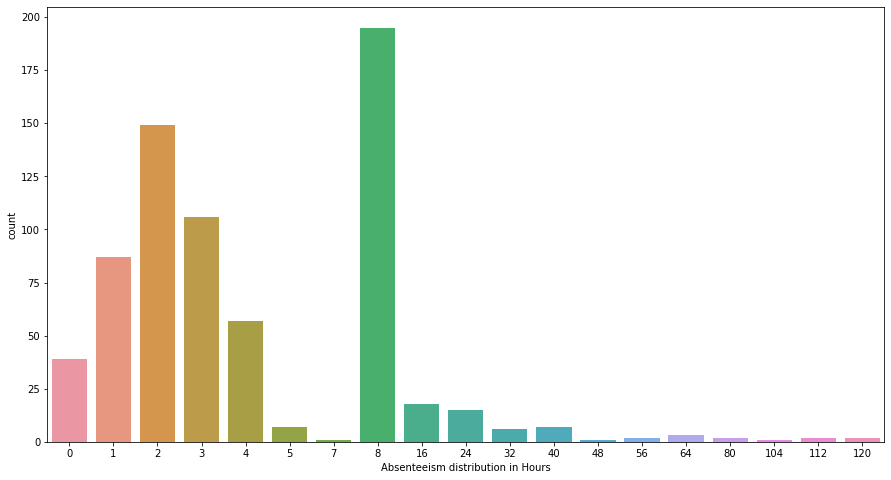

In [14]:
plt.figure(figsize=(15,8))
sns.countplot(data=raw_data,x='Absenteeism Time in Hours')
plt.xlabel('Absenteeism distribution in Hours')

Text(0.5, 0, 'Age distribution')

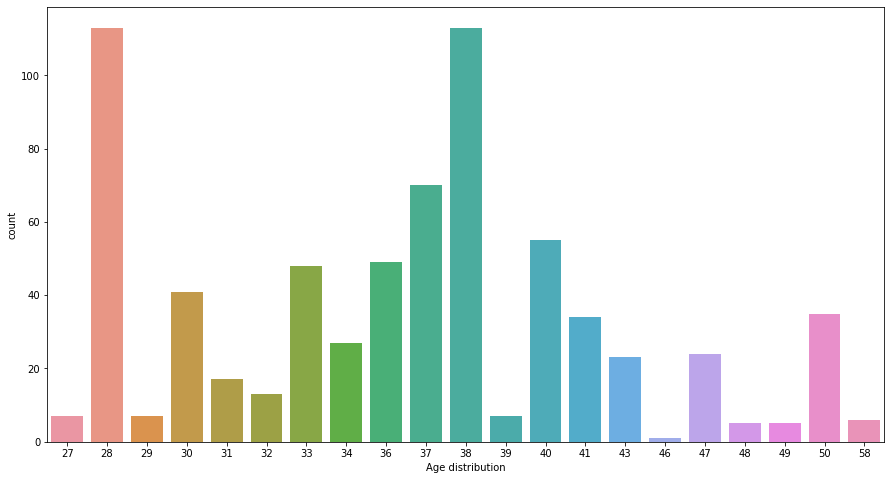

In [15]:
plt.figure(figsize=(15,8))
sns.countplot(data=raw_data,x='Age')
plt.xlabel('Age distribution')

Text(0.5, 0, 'Absense reasons')

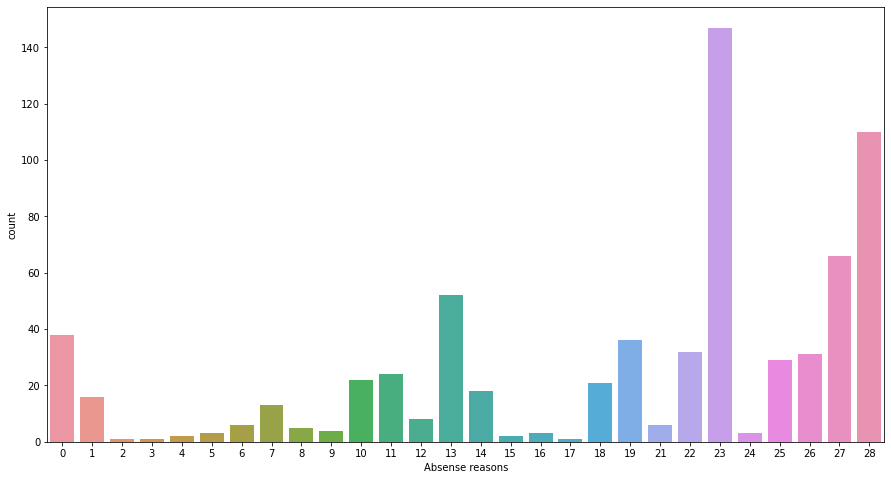

In [16]:
plt.figure(figsize=(15,8))
sns.countplot(data=raw_data,x='Reason for Absence')
plt.xlabel('Absense reasons')

## Medical, physiotheray and dental seem to account for the highest leave requests

Text(0, 0.5, 'Age')

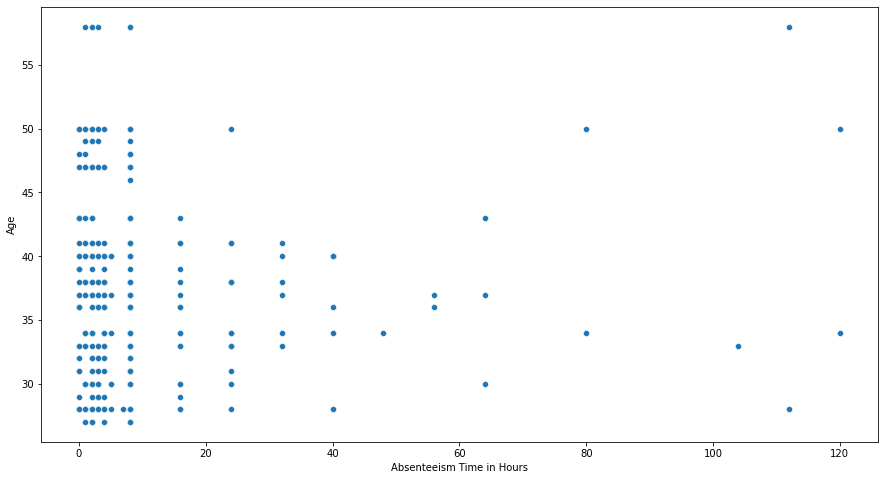

In [17]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=raw_data,x='Absenteeism Time in Hours',y='Age')
plt.xlabel('Absenteeism Time in Hours')
plt.ylabel('Age')

Text(0, 0.5, 'Workload')

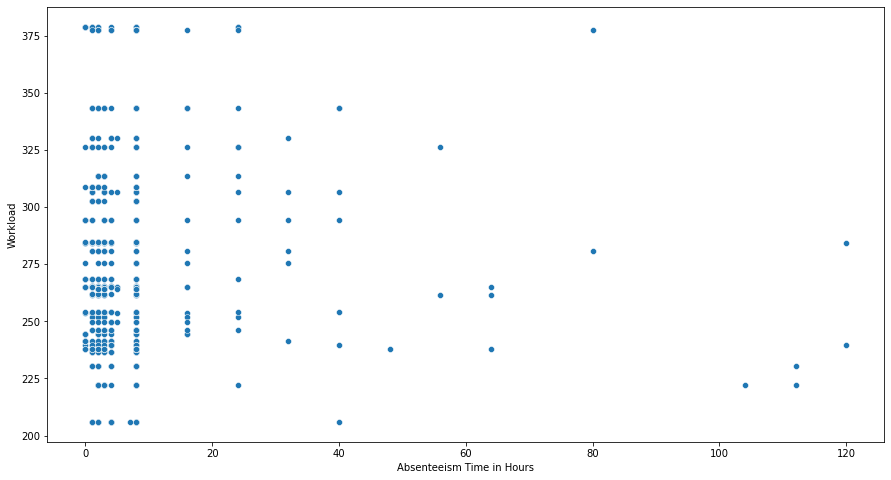

In [18]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=raw_data,x='Absenteeism Time in Hours',y='Daily Work Load Average')
plt.xlabel('Absenteeism Time in Hours')
plt.ylabel('Workload')

## Seems to not show any hints of higher workloads and older age being large factors like one would assume

In [19]:
raw_data.columns

Index(['ID', 'Reason for Absence', 'Date', 'Transportation Expense',
       'Distance to Work', 'Age', 'Daily Work Load Average', 'Body Mass Index',
       'Education', 'Children', 'Pets', 'Absenteeism Time in Hours'],
      dtype='object')

## How are other columns correlated with the absenteeism column

In [20]:
df_analysis = raw_data[['Transportation Expense',
       'Distance to Work', 'Age', 'Daily Work Load Average', 'Body Mass Index',
       'Education', 'Children', 'Pets', 'Absenteeism Time in Hours']]
df_analysis.corr()['Absenteeism Time in Hours'].sort_values()

Distance to Work            -0.080593
Body Mass Index             -0.040203
Education                   -0.035621
Pets                        -0.024522
Transportation Expense       0.008342
Daily Work Load Average      0.029609
Age                          0.035784
Children                     0.093661
Absenteeism Time in Hours    1.000000
Name: Absenteeism Time in Hours, dtype: float64

## Seems like the transportation expense, Work load, Age, Children are positively correlated with being absent
## Also childern seems to have the highest correlation, maybe expected that people with children are more likely to take leave 

Text(0, 0.5, 'Children')

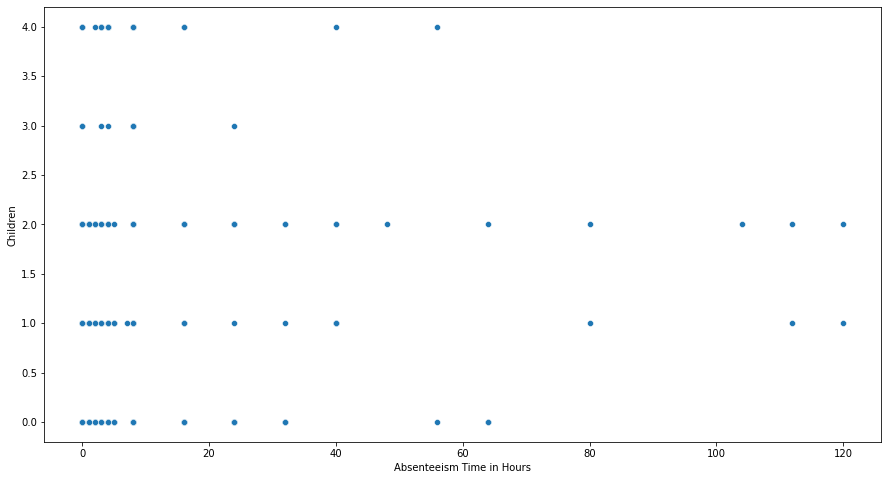

In [21]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=raw_data,x='Absenteeism Time in Hours',y='Children')
plt.xlabel('Absenteeism Time in Hours')
plt.ylabel('Children')

Text(0, 0.5, 'Pets')

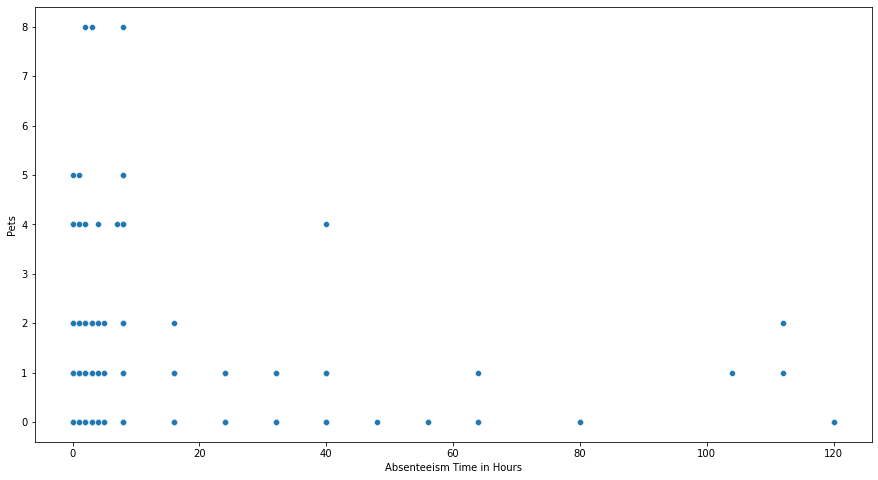

In [22]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=raw_data,x='Absenteeism Time in Hours',y='Pets')
plt.xlabel('Absenteeism Time in Hours')
plt.ylabel('Pets')

## No clear tend for people having more pets to be off more

Text(0, 0.5, 'BMI')

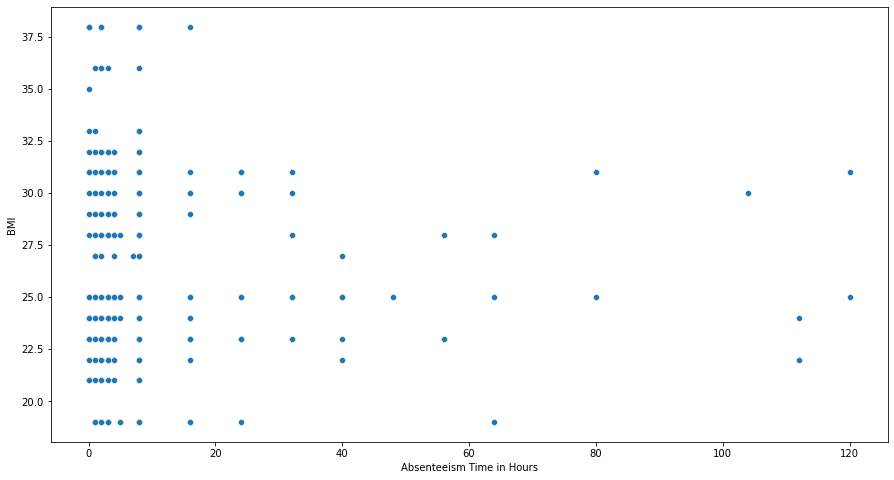

In [23]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=raw_data,x='Absenteeism Time in Hours',y='Body Mass Index')
plt.xlabel('Absenteeism Time in Hours')
plt.ylabel('BMI')

## Some increase in being absent as BMI goes up but above 31 it seems to be back down

In [24]:
df = raw_data.copy()

## The id column is not very useful in our analysis so we can drop it. Lets also format the date into a datetime object
## Can also split it up into month and day of the week to have a smaller number of groups for predictions

In [25]:
df= df.drop(['ID'],axis=1)
df.head()

,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,26,07/07/2015,289,36,33,239.554,30,1,2,1,4
1,0,14/07/2015,118,13,50,239.554,31,1,1,0,0
2,23,15/07/2015,179,51,38,239.554,31,1,0,0,2
3,7,16/07/2015,279,5,39,239.554,24,1,2,0,4
4,23,23/07/2015,289,36,33,239.554,30,1,2,1,2


In [26]:
df['Date'] = pd.to_datetime(df['Date'],format='%d/%m/%Y')

In [27]:
df.head()

,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,26,2015-07-07,289,36,33,239.554,30,1,2,1,4
1,0,2015-07-14,118,13,50,239.554,31,1,1,0,0
2,23,2015-07-15,179,51,38,239.554,31,1,0,0,2
3,7,2015-07-16,279,5,39,239.554,24,1,2,0,4
4,23,2015-07-23,289,36,33,239.554,30,1,2,1,2


In [28]:
#Lets split the date of absence into day of week, month and year
df['Month'] = df['Date'].dt.month
df.head()

,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Month
0,26,2015-07-07,289,36,33,239.554,30,1,2,1,4,7
1,0,2015-07-14,118,13,50,239.554,31,1,1,0,0,7
2,23,2015-07-15,179,51,38,239.554,31,1,0,0,2,7
3,7,2015-07-16,279,5,39,239.554,24,1,2,0,4,7
4,23,2015-07-23,289,36,33,239.554,30,1,2,1,2,7


In [29]:
df['Day of week'] = df['Date'].dt.weekday

In [30]:
## Grouping reasons into 4 groups disease, pregnancy related, injury related and doctors visits
def reason_fun1(reason):
    if reason <=14:
        return 1
    else: 
        return 0

def reason_fun2(reason):
    if (reason >15 and reason <=17):
        return 1
    else: 
        return 0
    
def reason_fun3(reason):
    if (reason >17 and reason <=21):
        return 1
    else: 
        return 0
    
def reason_fun4(reason):
    if reason>21:
        return 1
    else: 
        return 0

df['Reason_group1'] = np.vectorize(reason_fun1)(df['Reason for Absence'])
df['Reason_group2'] = np.vectorize(reason_fun2)(df['Reason for Absence'])
df['Reason_group3'] = np.vectorize(reason_fun3)(df['Reason for Absence'])
df['Reason_group4'] = np.vectorize(reason_fun4)(df['Reason for Absence'])

In [31]:
df.head(20)

,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Month,Day of week,Reason_group1,Reason_group2,Reason_group3,Reason_group4
0,26,2015-07-07,289,36,33,239.554,30,1,2,1,4,7,1,0,0,0,1
1,0,2015-07-14,118,13,50,239.554,31,1,1,0,0,7,1,1,0,0,0
2,23,2015-07-15,179,51,38,239.554,31,1,0,0,2,7,2,0,0,0,1
3,7,2015-07-16,279,5,39,239.554,24,1,2,0,4,7,3,1,0,0,0
4,23,2015-07-23,289,36,33,239.554,30,1,2,1,2,7,3,0,0,0,1
5,23,2015-07-10,179,51,38,239.554,31,1,0,0,2,7,4,0,0,0,1
6,22,2015-07-17,361,52,28,239.554,27,1,1,4,8,7,4,0,0,0,1
7,23,2015-07-24,260,50,36,239.554,23,1,4,0,4,7,4,0,0,0,1
8,19,2015-07-06,155,12,34,239.554,25,1,2,0,40,7,0,0,0,1,0
9,22,2015-07-13,235,11,37,239.554,29,3,1,1,8,7,0,0,0,0,1


In [32]:
df = df.drop(['Reason for Absence','Date'],axis=1)
df.head()

,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Month,Day of week,Reason_group1,Reason_group2,Reason_group3,Reason_group4
0,289,36,33,239.554,30,1,2,1,4,7,1,0,0,0,1
1,118,13,50,239.554,31,1,1,0,0,7,1,1,0,0,0
2,179,51,38,239.554,31,1,0,0,2,7,2,0,0,0,1
3,279,5,39,239.554,24,1,2,0,4,7,3,1,0,0,0
4,289,36,33,239.554,30,1,2,1,2,7,3,0,0,0,1


In [33]:
df['Education'].unique()

array([1, 3, 2, 4], dtype=int64)

## split education to high school and college graduate

In [34]:
df['Education'] = df['Education'].map({1:0,2:1,3:1,4:1})
df['Education'].unique()

array([0, 1], dtype=int64)

In [35]:
df['Education'].value_counts()

0    583
1    117
Name: Education, dtype: int64

In [36]:
df.head()

,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Month,Day of week,Reason_group1,Reason_group2,Reason_group3,Reason_group4
0,289,36,33,239.554,30,0,2,1,4,7,1,0,0,0,1
1,118,13,50,239.554,31,0,1,0,0,7,1,1,0,0,0
2,179,51,38,239.554,31,0,0,0,2,7,2,0,0,0,1
3,279,5,39,239.554,24,0,2,0,4,7,3,1,0,0,0
4,289,36,33,239.554,30,0,2,1,2,7,3,0,0,0,1


## Basic statistics

In [37]:
print('Mean Absenteeism',df['Absenteeism Time in Hours'].mean())
print('Median Absenteeism',df['Absenteeism Time in Hours'].median())
print('Mode Absenteeism',df['Absenteeism Time in Hours'].mode())

Mean Absenteeism 6.761428571428572
Median Absenteeism 3.0
Mode Absenteeism 0    8
Name: Absenteeism Time in Hours, dtype: int64


## Lets pick that someone is excessively absent if its greater than the median value so we can just make it a binary classification

In [38]:
df['Target'] = np.where(df['Absenteeism Time in Hours'] > df['Absenteeism Time in Hours'].median(),1,0)
df.head()

,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Month,Day of week,Reason_group1,Reason_group2,Reason_group3,Reason_group4,Target
0,289,36,33,239.554,30,0,2,1,4,7,1,0,0,0,1,1
1,118,13,50,239.554,31,0,1,0,0,7,1,1,0,0,0,0
2,179,51,38,239.554,31,0,0,0,2,7,2,0,0,0,1,0
3,279,5,39,239.554,24,0,2,0,4,7,3,1,0,0,0,1
4,289,36,33,239.554,30,0,2,1,2,7,3,0,0,0,1,0


In [39]:
df['Target'].value_counts()

0    381
1    319
Name: Target, dtype: int64

In [40]:
df.columns

Index(['Transportation Expense', 'Distance to Work', 'Age',
       'Daily Work Load Average', 'Body Mass Index', 'Education', 'Children',
       'Pets', 'Absenteeism Time in Hours', 'Month', 'Day of week',
       'Reason_group1', 'Reason_group2', 'Reason_group3', 'Reason_group4',
       'Target'],
      dtype='object')

In [41]:
# Reorder the columns
df = df[['Reason_group1', 'Reason_group2', 'Reason_group3', 'Reason_group4',
         'Transportation Expense', 'Distance to Work', 'Age',
       'Daily Work Load Average', 'Body Mass Index', 'Education', 'Children',
       'Pets', 'Absenteeism Time in Hours', 'Month', 'Day of week','Target']]
df.head()

,Reason_group1,Reason_group2,Reason_group3,Reason_group4,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Month,Day of week,Target
0,0,0,0,1,289,36,33,239.554,30,0,2,1,4,7,1,1
1,1,0,0,0,118,13,50,239.554,31,0,1,0,0,7,1,0
2,0,0,0,1,179,51,38,239.554,31,0,0,0,2,7,2,0
3,1,0,0,0,279,5,39,239.554,24,0,2,0,4,7,3,1
4,0,0,0,1,289,36,33,239.554,30,0,2,1,2,7,3,0


In [42]:
# Split into input and targets
X = df.drop(['Absenteeism Time in Hours','Target'],axis=1)
y = df['Target']
X.head()

,Reason_group1,Reason_group2,Reason_group3,Reason_group4,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Month,Day of week
0,0,0,0,1,289,36,33,239.554,30,0,2,1,7,1
1,1,0,0,0,118,13,50,239.554,31,0,1,0,7,1
2,0,0,0,1,179,51,38,239.554,31,0,0,0,7,2
3,1,0,0,0,279,5,39,239.554,24,0,2,0,7,3
4,0,0,0,1,289,36,33,239.554,30,0,2,1,7,3


In [44]:
# Keep 20% of data as test set and standardize the data so it will work well with non tree methods and deep learning if required
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

In [47]:
## Baseline model

In [48]:
log_baseline = LogisticRegression()
log_baseline.fit(X_train,y_train)
log_baseline_predict = log_baseline.predict(X_test)
print(classification_report(y_test,log_baseline_predict))

              precision    recall  f1-score   support

           0       0.62      0.72      0.66        67
           1       0.69      0.59      0.64        73

    accuracy                           0.65       140
   macro avg       0.65      0.65      0.65       140
weighted avg       0.66      0.65      0.65       140



In [49]:
## Testing Logistic model parameters
log_mod = LogisticRegression(max_iter=1000)
log_param = {'penalty':['elasticnet'],
             'solver':['saga'],
            'C':[0.001,0.01,0.1,0.2,0.5,0.9,0.99],
            'l1_ratio':[0,0.1,0.2,0.5,0.8,0.9,1]}
log_cv = GridSearchCV(log_mod,log_param)
log_cv.fit(X_train,y_train)

GridSearchCV(estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.001, 0.01, 0.1, 0.2, 0.5, 0.9, 0.99],
                         'l1_ratio': [0, 0.1, 0.2, 0.5, 0.8, 0.9, 1],
                         'penalty': ['elasticnet'], 'solver': ['saga']})

In [50]:
log_pred = log_cv.predict(X_test)
print(classification_report(y_test,log_pred))

              precision    recall  f1-score   support

           0       0.62      0.72      0.66        67
           1       0.69      0.59      0.64        73

    accuracy                           0.65       140
   macro avg       0.65      0.65      0.65       140
weighted avg       0.66      0.65      0.65       140



In [51]:
log_cv.best_params_

{'C': 0.9, 'l1_ratio': 0, 'penalty': 'elasticnet', 'solver': 'saga'}

## Lets try using an adaboosted tree

In [53]:
adatree_mod = AdaBoostClassifier()
adatree_param = {'n_estimators':[100,200,500],
                'learning_rate':[0.1,0.2,0.5,1,5,10]}
adatree_cv = GridSearchCV(adatree_mod,adatree_param)
adatree_cv.fit(X_train,y_train)

GridSearchCV(estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.1, 0.2, 0.5, 1, 5, 10],
                         'n_estimators': [100, 200, 500]})

In [54]:
adatree_pred = adatree_cv.predict(X_test)
print(classification_report(y_test,adatree_pred))

              precision    recall  f1-score   support

           0       0.65      0.73      0.69        67
           1       0.72      0.64      0.68        73

    accuracy                           0.69       140
   macro avg       0.69      0.69      0.69       140
weighted avg       0.69      0.69      0.69       140



In [119]:
adatree_cv.best_params_

{'learning_rate': 0.2, 'n_estimators': 500}

## Boosted tree works a bit better
## Lets see what support vector machines can do

In [56]:
from sklearn.svm import SVC
grid_svc_param = {'kernel':['linear','poly','rbf'],
                  'C':[0.001,0.01,0.1,0.2,0.5,0.8,0.9,0.99],
                  'degree':[2,3,5],
                  'gamma':['scale','auto']}
svc = SVC()

svc_cv = GridSearchCV(svc,grid_svc_param)
svc_cv.fit(X_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 0.2, 0.5, 0.8, 0.9, 0.99],
                         'degree': [2, 3, 5], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf']})

In [57]:
svc_pred = svc_cv.predict(X_test)
print(classification_report(y_test,svc_pred))

              precision    recall  f1-score   support

           0       0.73      0.66      0.69        67
           1       0.71      0.78      0.75        73

    accuracy                           0.72       140
   macro avg       0.72      0.72      0.72       140
weighted avg       0.72      0.72      0.72       140



In [58]:
svc_cv.best_params_

{'C': 0.9, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}

In [59]:
## Seems the best out of the bunch for the class we are interested in 

In [64]:
# Lets check if gradient boosting can work a bit
mod_boost = GradientBoostingClassifier()
mod_boost_param = {'n_estimators':[50,100,200],
             'learning_rate':[0.05,0.1,0.2,0.3],
             'max_depth':[2,3,4,5]}
grid_cv_boost = GridSearchCV(mod_boost,mod_boost_param)
grid_cv_boost.fit(X_train,y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.05, 0.1, 0.2, 0.3],
                         'max_depth': [2, 3, 4, 5],
                         'n_estimators': [50, 100, 200]})

In [66]:
gboost_pred = grid_cv_boost.predict(X_test)
print(classification_report(y_test,gboost_pred))

              precision    recall  f1-score   support

           0       0.64      0.66      0.65        67
           1       0.68      0.66      0.67        73

    accuracy                           0.66       140
   macro avg       0.66      0.66      0.66       140
weighted avg       0.66      0.66      0.66       140



## SVC method provides us with the best fit
## Lets use this into some deep learning to see if we can get something useful, too little data to work but lets try

In [131]:
print('X Train Shape: ', X_train.shape)
print('Y Train Shape: ', y_train.shape)
print('X Test Shape: ', X_test.shape)
print('y Test Shape: ', y_test.shape)

X Train Shape:  (560, 14)
Y Train Shape:  (560,)
X Test Shape:  (140, 14)
y Test Shape:  (140,)


In [139]:
import tensorflow as tf

In [277]:
X_train_deep, X_test_deep, y_train_deep, y_test_deep = train_test_split(X, y, test_size=0.1, random_state=101)
scalar = StandardScaler()
X_train_deep = scalar.fit_transform(X_train_deep)
X_test_deep = scalar.transform(X_test_deep)

In [278]:
print('X Train Shape Deep: ', X_train_deep.shape)
print('Y Train Shape Deep: ', y_train_deep.shape)

X Train Shape Deep:  (630, 14)
Y Train Shape Deep:  (630,)


In [300]:
input_size = 14

#Lets use a simple sequential model with 4 dense layers
#Layer 1/2 has 50 nodes
#layer 3 has 100 nodes
#Final layer to predict the outcome using a sigmod function
model=tf.keras.Sequential([tf.keras.layers.Dense(50,input_shape=(input_size,), activation='relu'),
                            tf.keras.layers.Dense(50, activation='relu'),
                            tf.keras.layers.Dense(100, activation='relu'),
                            tf.keras.layers.Dense(1, activation='sigmoid')])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#Split into 256 samples per batch and train for 30 iterations. Not enough data for deep learning to work so going higher in iterations will most likely overfit
batch_size = 256
max_epochs = 30

model.fit(X_train_deep,
         y_train_deep,
         batch_size = batch_size,
         epochs=max_epochs,
         verbose=0)

In [301]:
dnn_pred = model.predict(X_test)
dnn_pred2= np.where(dnn_pred>0.5,1,0)

5/5 [==============================] - 0s 5ms/step


In [302]:
print(classification_report(y_test,dnn_pred2))

              precision    recall  f1-score   support

           0       0.75      0.72      0.73        67
           1       0.75      0.78      0.77        73

    accuracy                           0.75       140
   macro avg       0.75      0.75      0.75       140
weighted avg       0.75      0.75      0.75       140



## Seems like deep learning can still work the best even with this limited dataset

In [305]:
## Lets just compare above result with a base case deep learning model
model_simple =tf.keras.Sequential([tf.keras.layers.Dense(100,input_shape=(input_size,), activation='relu'),
                            tf.keras.layers.Dense(1, activation='sigmoid')])

model_simple.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

batch_size = 256
max_epochs = 30

model_simple.fit(X_train,
         y_train,
         batch_size = batch_size,
         epochs=max_epochs,
         #validation_data=(deep_X_val,deep_y_val),
         verbose=0)

In [306]:
dnn_pred_simple = model_simple.predict(X_test)
dnn_pred2_simple = np.where(dnn_pred_simple>0.5,1,0)
print(classification_report(y_test,dnn_pred2_simple))

5/5 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

           0       0.64      0.70      0.67        67
           1       0.70      0.63      0.66        73

    accuracy                           0.66       140
   macro avg       0.67      0.67      0.66       140
weighted avg       0.67      0.66      0.66       140



 Tensorflow approach using a deep learning network achieves 77% F1 score on the label we case about. Overall 75% accuracy
 This will only get better with more data used for input compared to normal machine learning models
 which flatline in accuracy with large data